In [8]:
library(rhdf5)
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [4]:
fh <- "/iblm/netapp/data1/jezhou/crisprQTL/simulated_data_2guides_discrete_and_continuous_10-10-2022/sim.h5"
h5ls(fh)

,group,name,otype,dclass,dim
,<chr>,<chr>,<chr>,<chr>,<chr>
0,/,coeffs,H5I_DATASET,COMPOUND,13000
1,/,counts,H5I_GROUP,,
2,/counts,continuous,H5I_DATASET,INTEGER,13000 x 50000
3,/counts,discrete,H5I_DATASET,INTEGER,13000 x 50000
4,/,guides,H5I_GROUP,,
5,/guides,metadata,H5I_DATASET,COMPOUND,2000
6,/guides,noisy_guide_efficiencies,H5I_DATASET,COMPOUND,2000
7,/guides,one_hot,H5I_DATASET,INTEGER,50000 x 2000
8,/,linear_predictor,H5I_GROUP,,


In [5]:
coeffs <- h5read(fh, "coeffs")
head(coeffs)

,baselines,beta1,beta2,beta3,beta4
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,5.497290,0.000000,3.908605,1.504546,4.859441
2,2.851596,-2.619104,2.435755,4.080959,1.930977
3,1.581204,0.000000,3.490022,1.829472,2.618467
4,2.064817,0.000000,1.046097,2.319592,2.366617
5,3.142454,0.000000,2.911158,3.206253,4.944893
6,4.586918,0.000000,3.913898,1.872515,3.560908


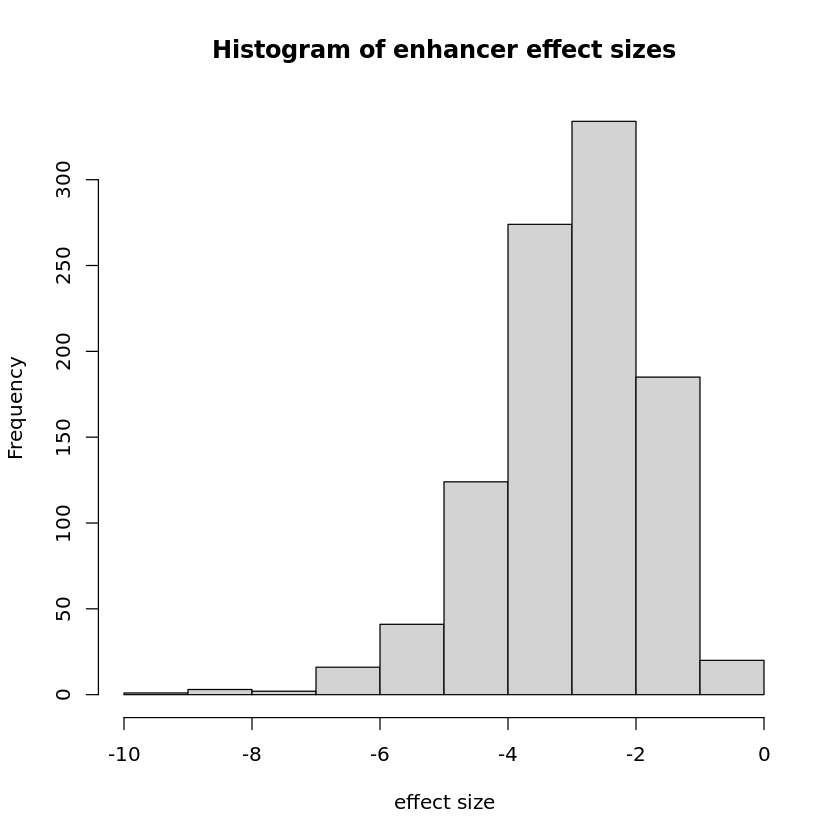

In [12]:
hist(coeffs %>% filter(beta1!=0) %>% pull(beta1),
    main = "Histogram of enhancer effect sizes",
     xlab = "effect size"
    )

In [17]:
pdf("/iblm/netapp/data1/jezhou/crisprQTL/simulated_data_2guides_discrete_and_continuous_10-10-2022/hist_enhancer_effects.pdf",
   width = 5, height = 5)

print(
hist(coeffs %>% filter(beta1!=0) %>% pull(beta1),
    main = "Histogram of enhancer effect sizes",
     xlab = "effect size"
    )
)

dev.off()

png("/iblm/netapp/data1/jezhou/crisprQTL/simulated_data_2guides_discrete_and_continuous_10-10-2022/hist_enhancer_effects.png",
    res = 300, units = "in", width = 5, height = 5)

print(
hist(coeffs %>% filter(beta1!=0) %>% pull(beta1),
    main = "Histogram of enhancer effect sizes",
     xlab = "effect size"
    )
)

dev.off()

$breaks
 [1] -10  -9  -8  -7  -6  -5  -4  -3  -2  -1   0

$counts
 [1]   1   3   2  16  41 124 274 334 185  20

$density
 [1] 0.001 0.003 0.002 0.016 0.041 0.124 0.274 0.334 0.185 0.020

$mids
 [1] -9.5 -8.5 -7.5 -6.5 -5.5 -4.5 -3.5 -2.5 -1.5 -0.5

$xname
[1] "coeffs %>% filter(beta1 != 0) %>% pull(beta1)"

$equidist
[1] TRUE

attr(,"class")
[1] "histogram"


png 
  2

$breaks
 [1] -10  -9  -8  -7  -6  -5  -4  -3  -2  -1   0

$counts
 [1]   1   3   2  16  41 124 274 334 185  20

$density
 [1] 0.001 0.003 0.002 0.016 0.041 0.124 0.274 0.334 0.185 0.020

$mids
 [1] -9.5 -8.5 -7.5 -6.5 -5.5 -4.5 -3.5 -2.5 -1.5 -0.5

$xname
[1] "coeffs %>% filter(beta1 != 0) %>% pull(beta1)"

$equidist
[1] TRUE

attr(,"class")
[1] "histogram"


png 
  2

In [3]:
guides.metadata <- h5read(fh, "guides/metadata")
head(guides.metadata)

,target.gene,efficiency,effect.size
,<int>,<dbl>,<dbl>
1,10485,0.4963379,-3.607479
2,11870,0.6271361,-3.297568
3,518,0.8094982,-3.020478
4,12341,0.3622067,-4.311901
5,1035,0.5298190,-1.776455
6,5131,0.8171457,-1.944886


In [4]:
which(guides.metadata$target.gene == 6178)

[1]   11 1011 2011 3011

In [5]:
noisy.efficiencies <- h5read(fh, "guides/noisy_guide_efficiencies")
head(noisy.efficiencies)

,1,10,100,guide,true
,<dbl>,<dbl>,<dbl>,<int>,<dbl>
1,0.0009381698,0.6621746,0.5070362,1,0.4963379
2,0.1280993461,0.8013760,0.6101027,2,0.6271361
3,0.7468066703,0.5945760,0.8233006,3,0.8094982
4,0.8523849145,0.2996767,0.3828461,4,0.3622067
5,0.0472172250,0.5514425,0.4999276,5,0.5298190
6,0.7086300104,0.7568990,0.8626259,6,0.8171457


In [6]:
noisy.efficiencies[,as.character(1)]

[1] 9.381698e-04 1.280993e-01 7.468067e-01 8.523849e-01 4.721723e-02
   [6] 7.086300e-01 2.666613e-05 8.908915e-01 5.777937e-02 5.966222e-01
  [11] 6.645873e-01 1.000000e+00 3.865537e-01 9.993344e-01 7.852846e-01
  [16] 8.638509e-01 9.977094e-01 9.998971e-01 3.304144e-02 9.830430e-01
  [21] 6.229790e-01 8.495688e-01 7.913216e-01 6.718126e-01 5.000395e-01
  [26] 9.478629e-01 3.662309e-01 9.599951e-01 9.610930e-01 2.999909e-01
  [31] 2.427045e-01 8.103727e-01 4.618504e-01 3.120879e-01 8.957142e-01
  [36] 8.603149e-01 7.744657e-01 7.461231e-01 8.291895e-01 1.106065e-01
  [41] 4.525385e-01 5.290576e-01 2.163527e-02 7.877252e-02 2.763753e-01
  [46] 1.532958e-01 9.930948e-01 9.961909e-01 9.995323e-01 9.999879e-01
  [51] 9.999788e-01 3.990464e-01 8.340991e-01 5.713997e-01 7.981314e-01
  [56] 9.997499e-01 8.481654e-01 9.999998e-01 3.026381e-01 3.683914e-01
  [61] 1.386015e-01 9.999883e-01 4.077835e-01 2.649591e-01 8.143575e-03
  [66] 9.982218e-01 3.520226e-01 1.000000e+00 1.351522e-01 9.992663e-01
  [71] 1.174313e-01 9.999960e-01 1.598189e-01 8.345008e-01 5.268421e-01
  [76] 4.189911e-02 1.327336e-02 9.766858e-01 9.911832e-01 2.222589e-01
  [81] 4.032783e-01 9.818449e-01 9.997477e-01 6.954290e-01 6.253122e-01
  [86] 9.675979e-01 9.871072e-01 7.167477e-01 7.289939e-01 5.109445e-01
  [91] 9.461643e-01 2.791049e-01 9.961468e-01 4.321347e-01 1.357206e-02
  [96] 9.968273e-01 4.910719e-01 3.415753e-01 2.925642e-01 7.868585e-01
 [101] 6.601253e-01 6.759319e-02 7.969313e-01 6.332584e-01 8.689833e-01
 [106] 8.788456e-01 8.160218e-01 7.742151e-01 7.030488e-01 9.502230e-01
 [111] 7.320545e-01 4.346401e-01 8.718332e-01 2.358200e-03 3.307004e-01
 [116] 8.752072e-02 9.930984e-01 9.999962e-01 2.272282e-02 6.163692e-01
 [121] 5.663630e-01 9.993786e-01 1.527147e-01 4.806169e-01 9.060524e-01
 [126] 3.471512e-01 9.999938e-01 9.988580e-01 9.973257e-01 8.805065e-01
 [131] 3.947091e-01 2.510607e-03 7.289876e-01 9.251095e-01 9.983953e-01
 [136] 9.871506e-01 9.286952e-01 9.383778e-01 9.999998e-01 6.149949e-01
 [141] 9.990135e-01 9.999778e-01 1.144267e-02 3.793955e-01 2.288555e-01
 [146] 9.998859e-01 9.974954e-01 1.296826e-02 9.922930e-01 9.028828e-02
 [151] 6.349912e-01 9.988617e-01 7.032114e-01 4.506017e-01 3.058719e-01
 [156] 1.912017e-01 9.804883e-01 3.925918e-02 9.734940e-01 8.135433e-01
 [161] 9.558579e-01 7.667652e-01 6.013171e-01 3.750945e-01 9.555983e-01
 [166] 9.942558e-01 9.630836e-01 9.590381e-01 6.479832e-01 5.731468e-01
 [171] 2.158932e-01 9.988439e-01 1.373039e-02 9.020151e-01 9.891222e-01
 [176] 8.072992e-01 2.273227e-01 5.681152e-04 9.894899e-02 2.337239e-02
 [181] 8.003016e-01 2.358543e-01 8.909173e-01 3.126314e-01 9.998644e-01
 [186] 8.377674e-01 9.939627e-01 7.925540e-01 9.776120e-01 5.018661e-01
 [191] 9.999999e-01 4.361210e-01 8.087445e-01 9.999391e-01 9.908383e-01
 [196] 9.980209e-01 9.999406e-01 1.176636e-01 3.318095e-04 2.171468e-03
 [201] 8.623026e-02 9.994463e-01 9.760925e-01 4.907181e-01 9.999996e-01
 [206] 9.790131e-01 4.574676e-02 9.979199e-01 8.905170e-01 5.033705e-01
 [211] 4.158750e-01 9.764463e-01 4.612685e-01 9.999634e-01 9.999630e-01
 [216] 3.816777e-01 2.458230e-01 1.838940e-01 1.890822e-01 4.466378e-01
 [221] 9.998997e-01 9.977015e-01 1.219889e-01 5.732006e-01 9.908043e-01
 [226] 6.239173e-01 9.847491e-01 9.998894e-01 3.179670e-01 1.000000e+00
 [231] 9.782038e-01 5.180357e-02 8.339222e-02 5.839251e-01 2.822381e-01
 [236] 4.032809e-02 9.990965e-01 9.999992e-01 4.740225e-01 9.999999e-01
 [241] 9.992728e-01 9.929543e-01 9.997857e-01 9.816136e-01 4.564078e-02
 [246] 7.102312e-01 9.865875e-01 9.110126e-01 1.169719e-04 9.999588e-01
 [251] 9.297991e-03 9.809544e-01 1.874427e-02 1.864556e-02 5.729688e-01
 [256] 1.998946e-01 1.834207e-01 7.861791e-01 9.698991e-01 9.999996e-01
 [261] 9.732794e-01 5.332823e-01 5.068417e-01 1.927740e-01 9.999979e-01
 [266] 8.886652e-01 5.813135e-01 8.735634e-03 9.712721e-01 9.636827e-01
 [271] 1.773312e-01 9.999557e-01 2.015500e-01 1.989412e-01 8.240738e-02
 [276] 9.976812e-01 1.225550e-01 6.354139e-